<a href="https://colab.research.google.com/github/bimarshak7/liver-cirrhosis-prediction/blob/main/cirrhosis_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cirrhosis Prediction

**SCENARIO**  
Cirrhosis is a chronic liver disease that occurs when healthy liver tissue is replaced by scar tissue, leading to a progressive loss of liver function. The scar tissue that forms in the liver can block blood flow through the liver and prevent it from working properly.Cirrhosis can have a number of causes, including chronic hepatitis B or C, alcohol abuse, nonalcoholic fatty liver disease, and autoimmune disorders. Symptoms of cirrhosis can include fatigue, jaundice, itching, bruising easily, and abdominal swelling.

There is no cure for cirrhosis, but treatment can help manage the symptoms and slow the progression of the disease. Diagnosis of this disease includes procedures like blood tests, medical history analysis, physical examination, imaging studies and so on. The fatal stages of cirrhosis are easily diagnosed but at this stage the liver is severely damaged and is no longer able to function properly.

Early diagnosis is necessary to save the liver of a patient. Liver biopsy can identify cirrhosis at early stage but it require to operate on the patient and also is time consuming. So, there is a necessity of a intelligent system which could identify cirrhosis even at earlier stages with the help of different biomarkers.


**PROBLEM STATEMENT**  
In this project our goal is to identify liver cirrhosis at different stages. This problem is formulated as classification problem to identify cirrhosis at four different stages (from 1 to 4) using different biomarkers.

**DATASET**  
The dataset used contains the information collected from the Mayo Clinic trial in primary biliary cirrhosis (PBC) of the liver conducted between 1974 and 1984.
A total of 424 PBC patients, referred to Mayo Clinic during that ten-year interval, met eligibility criteria for the randomized placebo-controlled trial of the drug D-penicillamine. The first 312 cases in the dataset participated in the randomized trial and contain largely complete data. The additional 112 cases did not participate in the clinical trial but consented to have basic measurements recorded and to be followed for survival. Six of those cases were lost to follow-up shortly after diagnosis, so the data here are on an additional 106 cases as well as the 312 randomized participants.

**Attribute Information**  
1. ID: unique identifier  
2. N_Days: number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986  
3. Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)  
4. Drug: type of drug D-penicillamine or placebo  
5. Age: age in [days]  
6. Sex: M (male) or F (female)  
7. Ascites: presence of ascites N (No) or Y (Yes)  
8. Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes)  
9. Spiders: presence of spiders N (No) or Y (Yes)  
10. Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)  
11. Bilirubin: serum bilirubin in [mg/dl]  
12. Cholesterol: serum cholesterol in [mg/dl]  
13. Albumin: albumin in [gm/dl]  
14. Copper: urine copper in [ug/day]  
15. Alk_Phos: alkaline phosphatase in [U/liter]  
16. SGOT: SGOT in [U/ml]  
17. Triglycerides: triglicerides in [mg/dl]  
18. Platelets: platelets per cubic [ml/1000]  
19. Prothrombin: prothrombin time in seconds [s]  
20. Stage: histologic stage of disease (1, 2, 3, or 4)

In [29]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split

In [2]:
#snippet to mount drive and copy kaggle API keys
# palge you kaggle keys at MyDrive/Colab Notebooks/ as kaggle.json
from google.colab import drive
drive.mount('/content/drive')
! mkdir ~/.kaggle
!cp "/content/drive/MyDrive/Colab Notebooks/kaggle.json" ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

Mounted at /content/drive


In [3]:
# download dataset from kaggle and unzip
!kaggle datasets download -d fedesoriano/cirrhosis-prediction-dataset
!unzip -q *.zip

  0% 0.00/11.0k [00:00<?, ?B/s]
100% 11.0k/11.0k [00:00<00:00, 31.9MB/s]


# Learn the data

In [95]:
# load dataset as pandas dataframe
cir = pd.read_csv('/content/cirrhosis.csv')
cir.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [97]:
#drop irrelevant columns
cir.drop(['ID'],axis=1,inplace=True)

In [98]:
#convert age to years from days
cir["Age"] = cir["Age"]/365.2425

In [99]:
# look at the possible values in categorical columns
cat_cols = []
for col in cir.columns:
  if(cir[col].dtype=="O"):
    cat_cols.append(col)
    print(col,": ",cir[col].unique())

Status :  ['D' 'C' 'CL']
Drug :  ['D-penicillamine' 'Placebo' nan]
Sex :  ['F' 'M']
Ascites :  ['Y' 'N' nan]
Hepatomegaly :  ['Y' 'N' nan]
Spiders :  ['Y' 'N' nan]
Edema :  ['Y' 'N' 'S']


In [100]:
# short glance of numerical data
cir.describe().T.style.background_gradient(cmap = 'BuGn')

,count,mean,std,min,25%,50%,75%,max
N_Days,418.000000,1917.782297,1104.672992,41.000000,1092.750000,1730.000000,2613.500000,4795.000000
Age,418.000000,50.742593,10.447429,26.278431,42.833186,51.001732,58.242127,78.441036
Bilirubin,418.000000,3.220813,4.407506,0.300000,0.800000,1.400000,3.400000,28.000000
Cholesterol,284.000000,369.510563,231.944545,120.000000,249.500000,309.500000,400.000000,1775.000000
Albumin,418.000000,3.497440,0.424972,1.960000,3.242500,3.530000,3.770000,4.640000
Copper,310.000000,97.648387,85.613920,4.000000,41.250000,73.000000,123.000000,588.000000
Alk_Phos,312.000000,1982.655769,2140.388824,289.000000,871.500000,1259.000000,1980.000000,13862.400000
SGOT,312.000000,122.556346,56.699525,26.350000,80.600000,114.700000,151.900000,457.250000
Tryglicerides,282.000000,124.702128,65.148639,33.000000,84.250000,108.000000,151.000000,598.000000
Platelets,407.000000,257.024570,98.325585,62.000000,188.500000,251.000000,318.000000,721.000000


The numerical attributes are at varying range. We will perform feature scaling later.

## Work on missing values

In [101]:
cir.isna().sum()

N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

We got too many null values. Looking at number of rows, its not feasible to drop rows containing null values.

In [102]:
cir[cir["Stage"].isna()]

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
312,4062,C,NaN,60.001232,F,NaN,NaN,NaN,N,0.7,NaN,3.65,NaN,NaN,NaN,NaN,378.0,11.0,NaN
316,3030,C,NaN,62.002642,F,NaN,NaN,NaN,N,0.8,NaN,2.48,NaN,NaN,NaN,NaN,273.0,10.0,NaN
318,41,D,NaN,46.002314,F,NaN,NaN,NaN,N,5.0,NaN,2.93,NaN,NaN,NaN,NaN,260.0,10.4,NaN
321,2011,D,NaN,64.001314,F,NaN,NaN,NaN,N,1.1,NaN,3.69,NaN,NaN,NaN,NaN,139.0,10.5,NaN
333,466,D,NaN,56.001150,F,NaN,NaN,NaN,N,7.1,NaN,3.51,NaN,NaN,NaN,NaN,721.0,11.8,NaN
336,2286,D,NaN,56.001150,F,NaN,NaN,NaN,N,1.8,NaN,3.64,NaN,NaN,NaN,NaN,141.0,10.0,NaN


With too many missing values in rows where the target value is also missing, so lets drop rows with missing target value.

In [103]:
#drop rows with missing target(stage) value
cir.dropna(axis=0,subset=["Stage"],inplace=True)

In [104]:
cir["Stage"] = cir["Stage"].astype(int)

In [105]:
plt.style.use('fivethirtyeight')

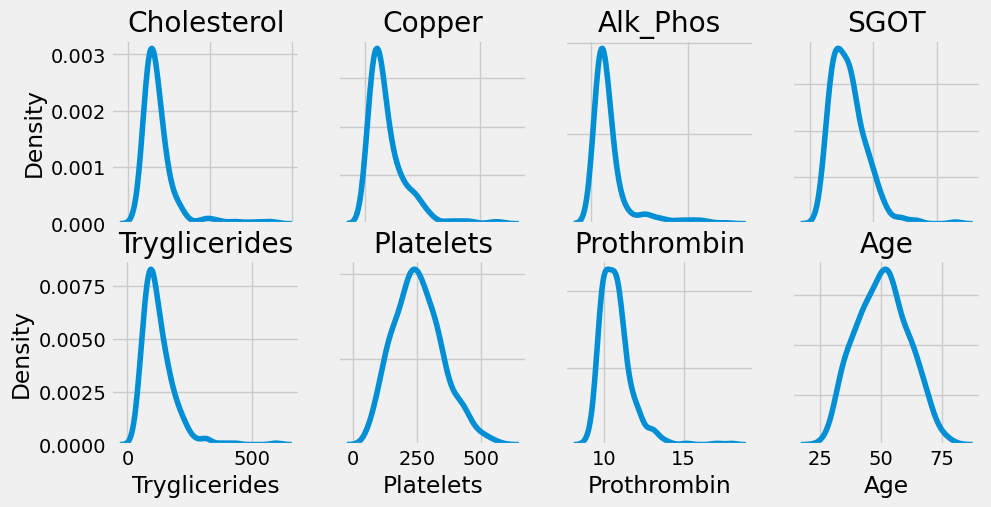

<Figure size 1200x800 with 0 Axes>

In [106]:
#checking data distributions for numerical features
#age doesn't have missing values, used here just to balance subplot
missing_nums = [["Cholesterol","Copper","Alk_Phos","SGOT"],["Tryglicerides","Platelets","Prothrombin","Age"]]
fig, axs = plt.subplots(2, 4,figsize=(10,5))
plt.figure(figsize=(12,8))
for i in range(2):
  for j in range(4):
    sns.kdeplot(cir,x=missing_nums[i][j], ax=axs[i,j])
    axs[i,j].label_outer()
    axs[i,j].set_title(missing_nums[i][j])
plt.show()

All the numerical features with missing values follows gaussian distributiom with some degree of skewness, so lets use median to impute missing values in those colums.

In [107]:
for cols in missing_nums:
  for col in cols:
    #impute missing values with median of respective column
    cir[col].fillna(cir[col].median(), inplace=True)

Now we are left with null values in cateforical columns.
We will use mode imputaion(most frequent values) for categorical columns.

In [108]:
for col in cat_cols:
    cir[col].fillna(cir[col].mode().values[0], inplace=True)

cir.isna().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

## Columns encoding

We have some categorical columns with string values.Many ML algorithms couldn't work with such values. So, lets use appropriate encoding to encode them. We will use two types of encoding:
1. One hot Encoding : Status,Drugs,Sex  
2. Label Encoding : Ascites, Hepatomegaly, Spiders, Edema

In [109]:
from sklearn.preprocessing import LabelEncoder

In [110]:
# one hot encoding for nominal values columns
cir_encoded = pd.get_dummies(cir, columns=["Status","Drug","Sex"])
# cir_encoded.head()

In [111]:
# one hot encoding for ordinal values columns
label_encode_cols = ["Ascites", "Hepatomegaly", "Spiders", "Edema"]
le = LabelEncoder()

for col in label_encode_cols:
  cir_encoded[col] = le.fit_transform(cir_encoded[col])
# cir_encoded.head()

In [112]:
cols_order = ["N_Days","Age","Sex_F","Sex_M","Status_C","Status_CL","Status_D","Drug_D-penicillamine","Drug_Placebo","Ascites","Hepatomegaly","Spiders","Edema","Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets","Prothrombin","Stage"]
cir_encoded = cir_encoded.reindex(columns=cols_order)
cir_encoded.head()

,N_Days,Age,Sex_F,Sex_M,Status_C,Status_CL,Status_D,Drug_D-penicillamine,Drug_Placebo,Ascites,...,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,58.766436,1,0,0,0,1,1,0,1,...,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4
1,4500,56.447429,1,0,1,0,0,1,0,0,...,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3
2,1012,70.073992,0,1,0,0,1,1,0,0,...,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4
3,1925,54.741713,1,0,0,0,1,1,0,0,...,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4
4,1504,38.106190,1,0,0,1,0,0,1,0,...,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3


## Dataset balancing

In [113]:
#Check number of instance for each stage
def plot_target_count(data):
  """Function to plot number of samples in each class"""

  plt.figure(figsize=(4,4))
  counts = data.value_counts()

  plt.bar(x = counts.index, height = counts, color = 'orange')
  plt.xticks(rotation = 90)
  plt.title('Target Counts')
  plt.xlabel('Stages')
  plt.ylabel('Counts')
  plt.xticks([1,2,3,4], ['Stage 1', 'Stage 2', 'Stage 3', 'Stage 4'], rotation = 0)
  plt.show()

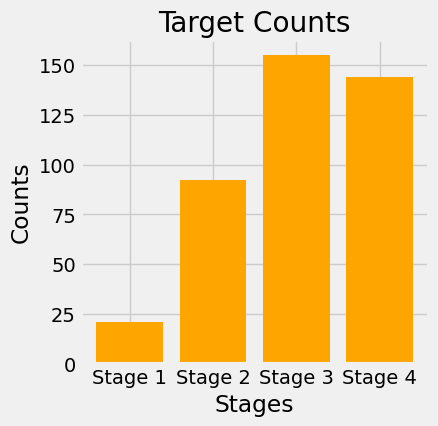

In [114]:
plot_target_count(cir_encoded["Stage"])

The dataset is highly imbalanced with less number of rows for earlier stage of cirrhosis. We will perform oversampling using SMOTE(Synthetic Minority Oversampling Technique) with Edited Nearest Neighbor (ENN).

In [115]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours

Before performing oversamling we will split our existing dataset into train and test set. We will use 80-20 split for train and test set.

In [116]:
X = cir_encoded.drop("Stage",axis=1)
y = cir_encoded["Stage"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

In [117]:
smote = SMOTE(sampling_strategy='all')
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

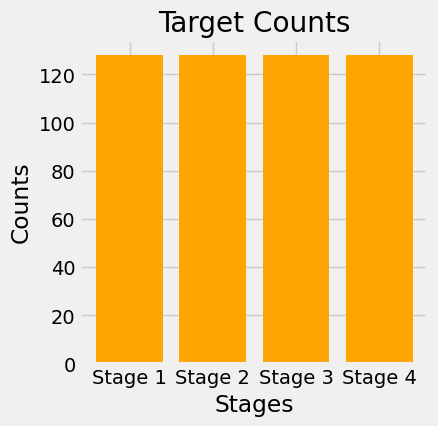

In [118]:
plot_target_count(y_train_resampled)

Looks good.

## Feature Scaling

In [123]:
numeric_cols = ['N_Days','Age','Bilirubin','Cholesterol','Albumin','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin']

In [124]:
#function to perform feature scaling using standard scaler
def scaler(model,df_train,df_test):
  model.fit(df_train)

  scaled_train = model.transform(df_train)
  scaled_test = model.transform(df_test)

  return scaled_train,scaled_test

In [125]:
from sklearn.preprocessing import StandardScaler

In [126]:
X_train_resampled[numeric_cols],X_test[numeric_cols] = scaler(StandardScaler(),X_train_resampled[numeric_cols],X_test[numeric_cols])

## Feature Selection

In [131]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [138]:
best = SelectKBest( score_func = f_classif, k = 20)
fit = best.fit(X_train_resampled, y_train_resampled)

In [139]:
best.get_support(indices=True)

array([ 0,  1,  2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 18,
       19, 20, 21])

In [141]:
fit.feature_names_in_

array(['N_Days', 'Age', 'Sex_F', 'Sex_M', 'Status_C', 'Status_CL',
       'Status_D', 'Drug_D-penicillamine', 'Drug_Placebo', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides',
       'Platelets', 'Prothrombin'], dtype=object)

In [144]:
for feature,score,pvalue in zip(fit.feature_names_in_,fit.scores_,fit.pvalues_):
  print(feature,score)

N_Days 42.75097302297251
Age 9.340678831427612
Sex_F 13.228144714819107
Sex_M 2.4800961394021335
Status_C 33.821972305102896
Status_CL 2.849182226081922
Status_D 47.88092849020001
Drug_D-penicillamine 3.9932975582422787
Drug_Placebo 18.33385106566572
Ascites 14.497205060311858
Hepatomegaly 88.1793488372093
Spiders 23.258279026466283
Edema 19.69577604360213
Bilirubin 12.53013709869693
Cholesterol 12.591249001298339
Albumin 46.07748780758625
Copper 15.725635344784955
Alk_Phos 2.5220755488536413
SGOT 23.170681977285515
Tryglicerides 4.934503432005638
Platelets 12.696950463518498
Prothrombin 17.126221725613295


## Model Selection